# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(-0.5, 63.5, 63.5, -0.5)

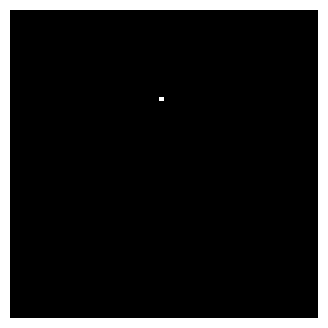

In [173]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'

fileNames = ["dom.png", "kwadraty.png", "lab112.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)


def show_all(images = [], vertical = False):
    def append_plot(ax, image):
        ax.imshow(image, 'gray')

    n = len(images)
    shorter_side = 10
    longer_side = 5 * len(images)

    if vertical:
        fig, axs = plt.subplots( n, 1 )
        fig.set_size_inches(shorter_side, longer_side)
    else:
        fig, axs = plt.subplots( 1, n )
        fig.set_size_inches(longer_side, shorter_side)


    if len(images) == 1:
        image = images[0]
        append_plot(axs, image)
    else:
        for i in range(len(images)):
            image = images[i]
            append_plot(axs[i], image)
    plt.show()

def open_image(path, gray = True):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY if gray else cv2.COLOR_BGR2RGB)
    return image


im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [174]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

def hough_transform(image, n, show = True):
    transformed = image
    theta = None
    for _ in range(n):
        transformed, theta, rho = hough_line(transformed, theta)
        if show: 
            show_hough(transformed, image)
    return transformed
    

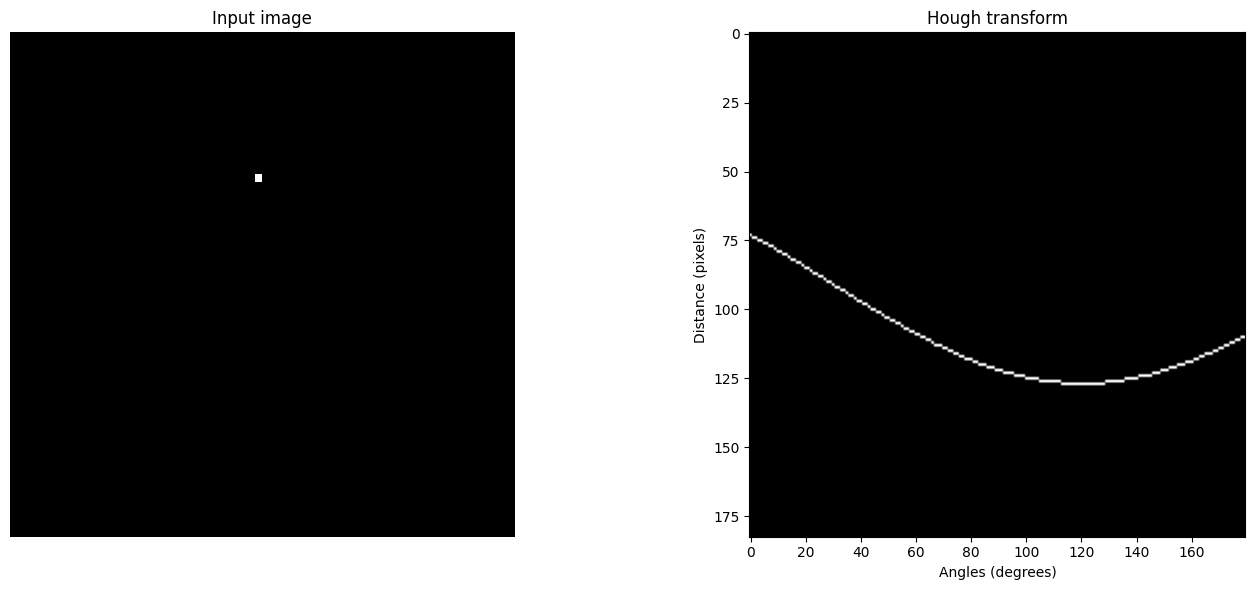

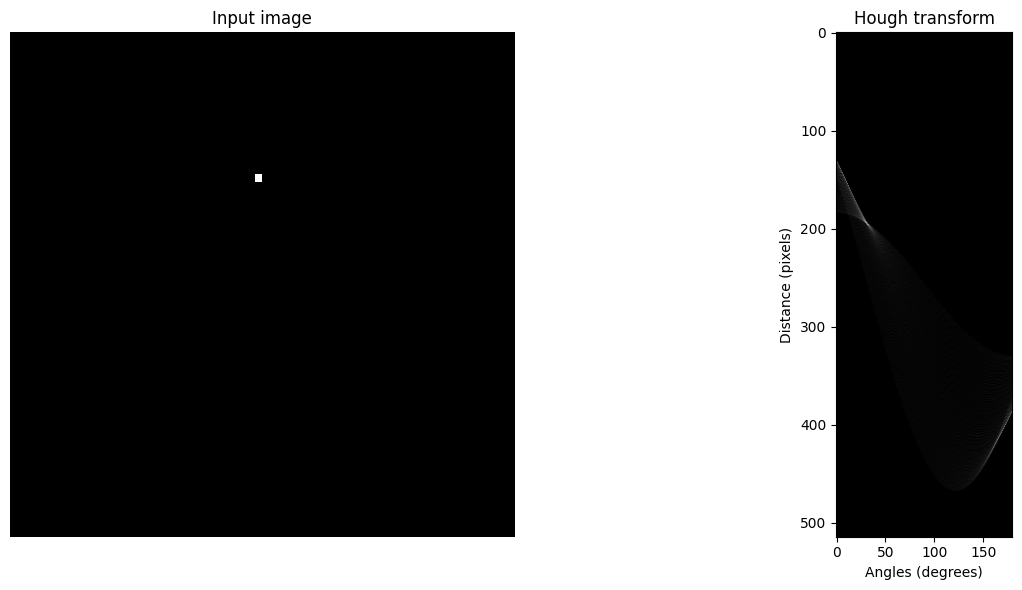

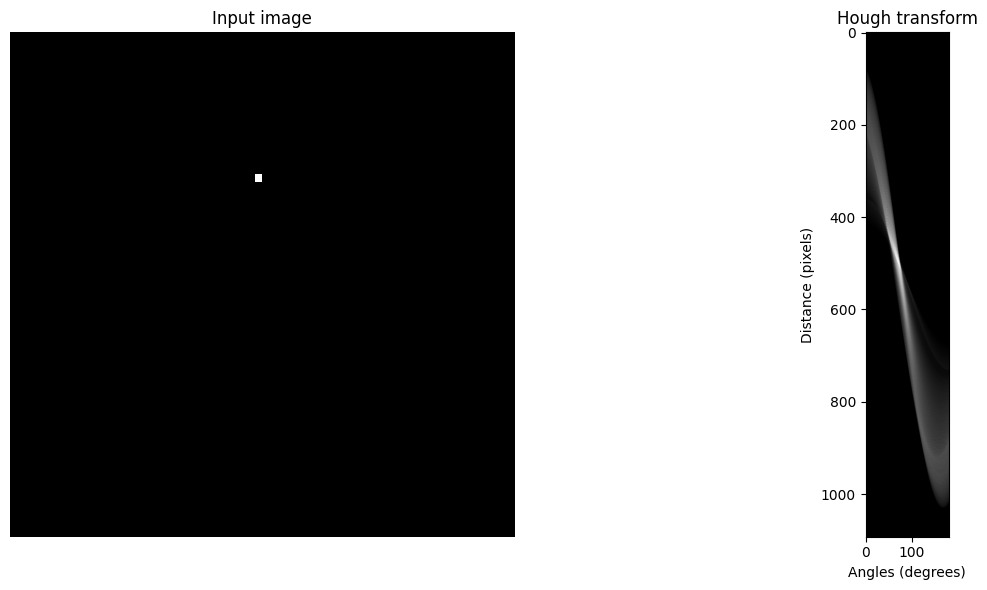

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint64)

In [175]:
hough_transform(im, 3)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?

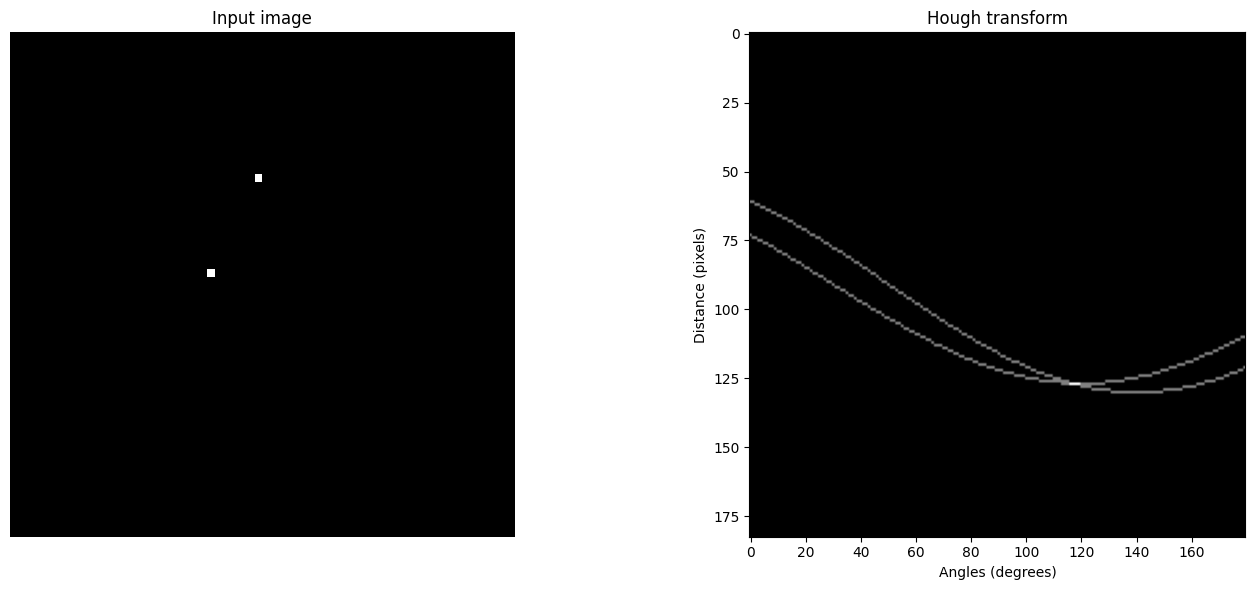

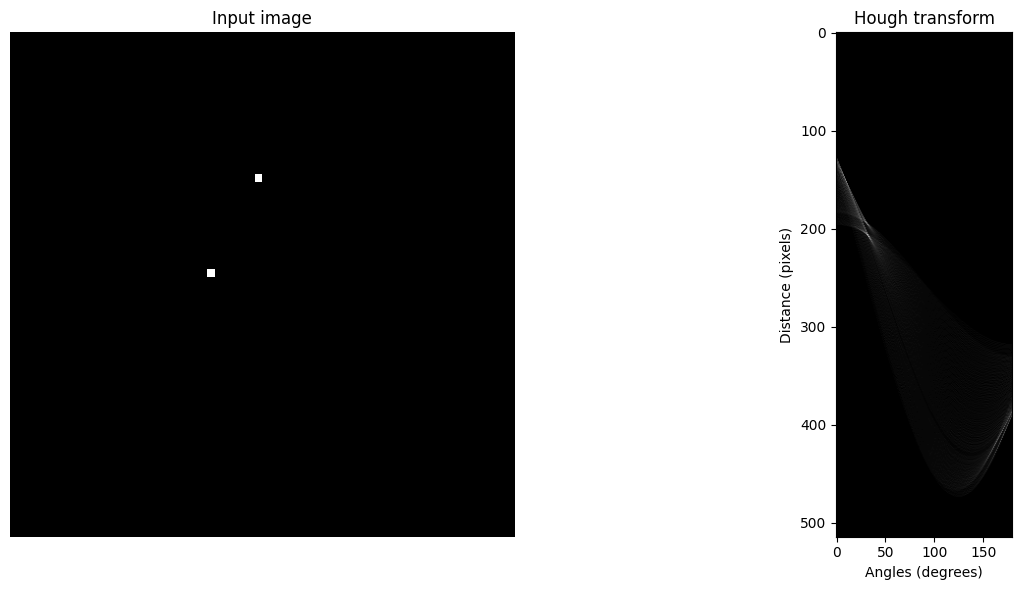

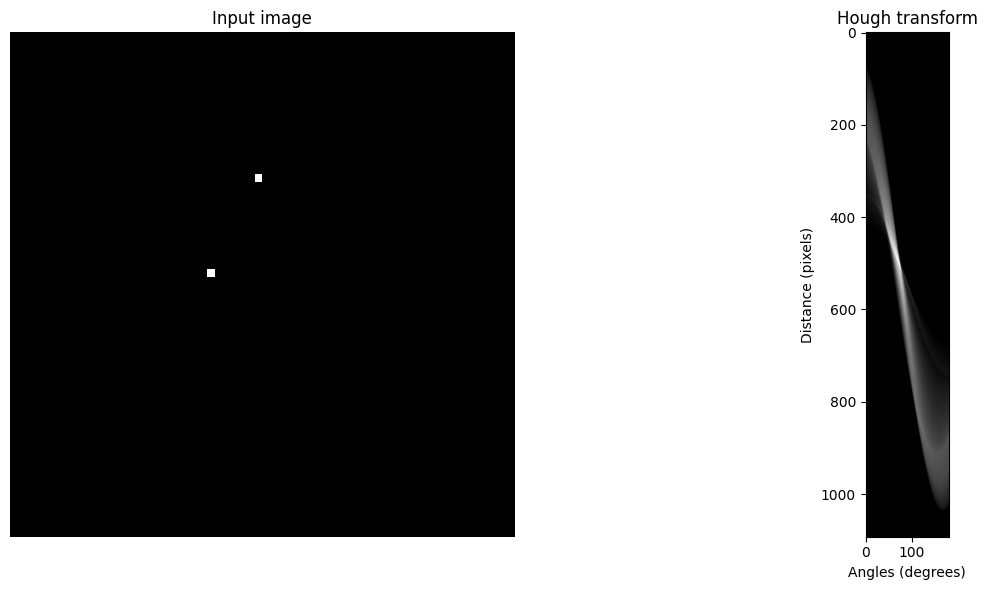

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint64)

In [176]:
im2 = im.copy()

im2[30, 25] = 1

hough_transform(im2, 3)


6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha

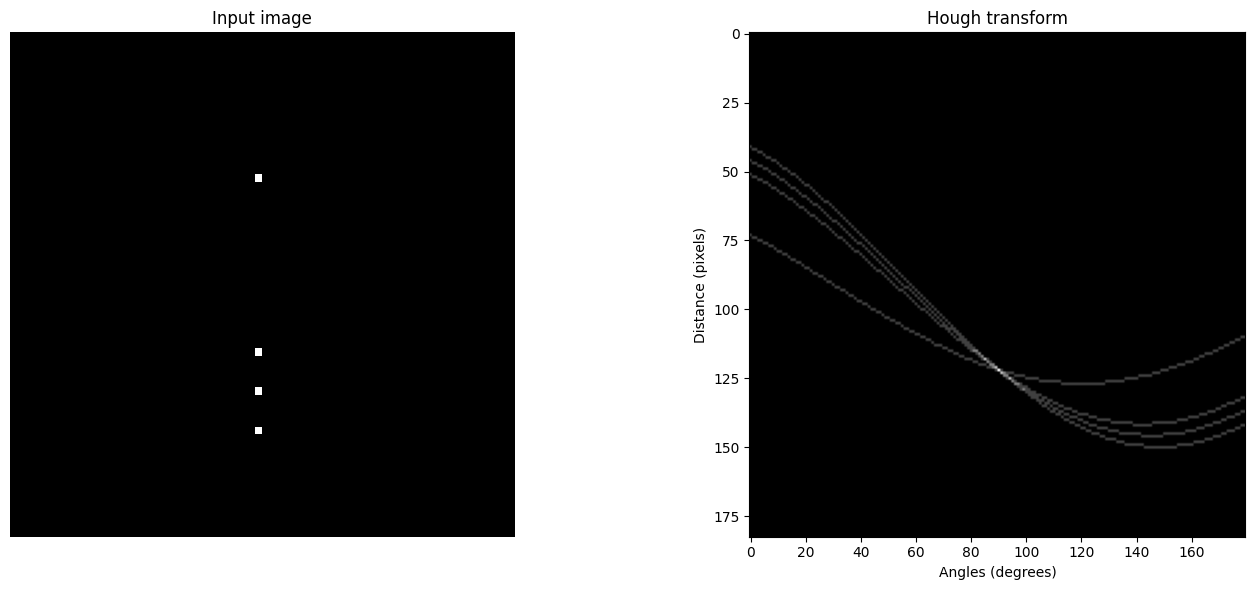

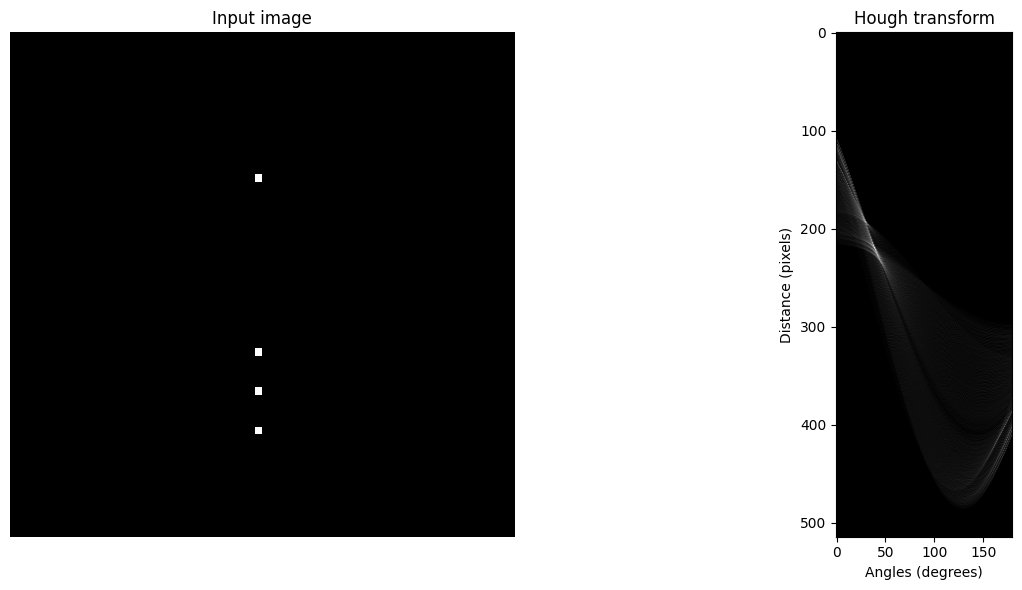

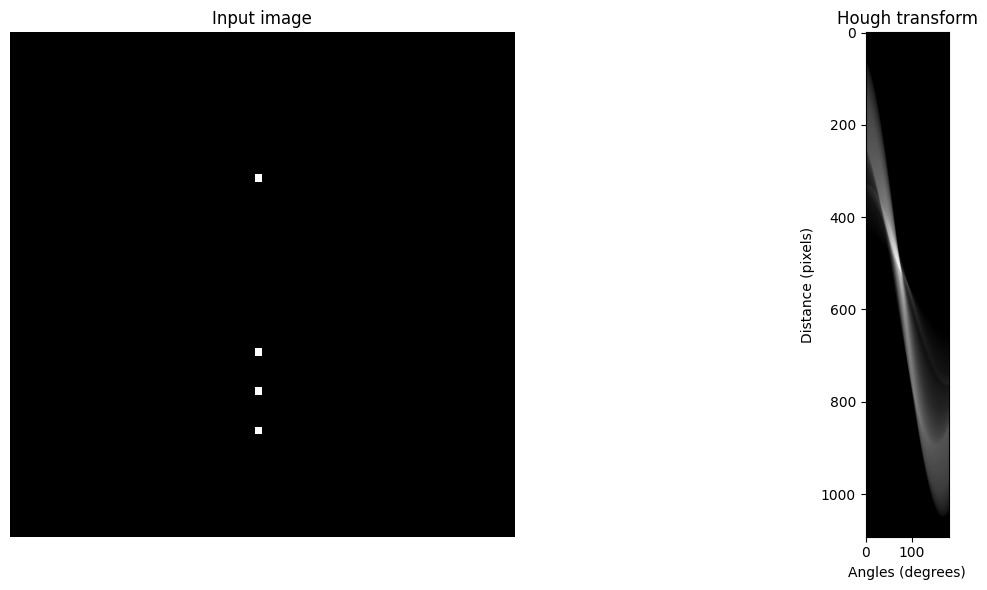

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint64)

In [177]:
im3 = im.copy()

im3[40, 31] = 1
im3[45, 31] = 1
im3[50, 31] = 1

hough_transform(im3, 3)

7. Poeksperymentuj z różnymi układami punktów

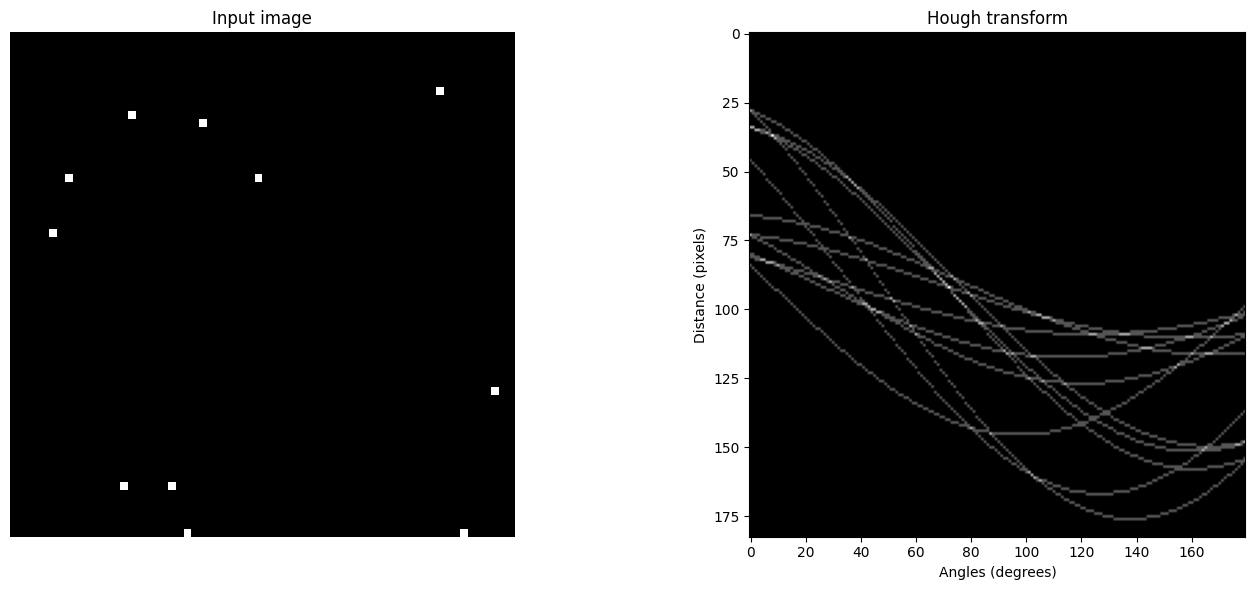

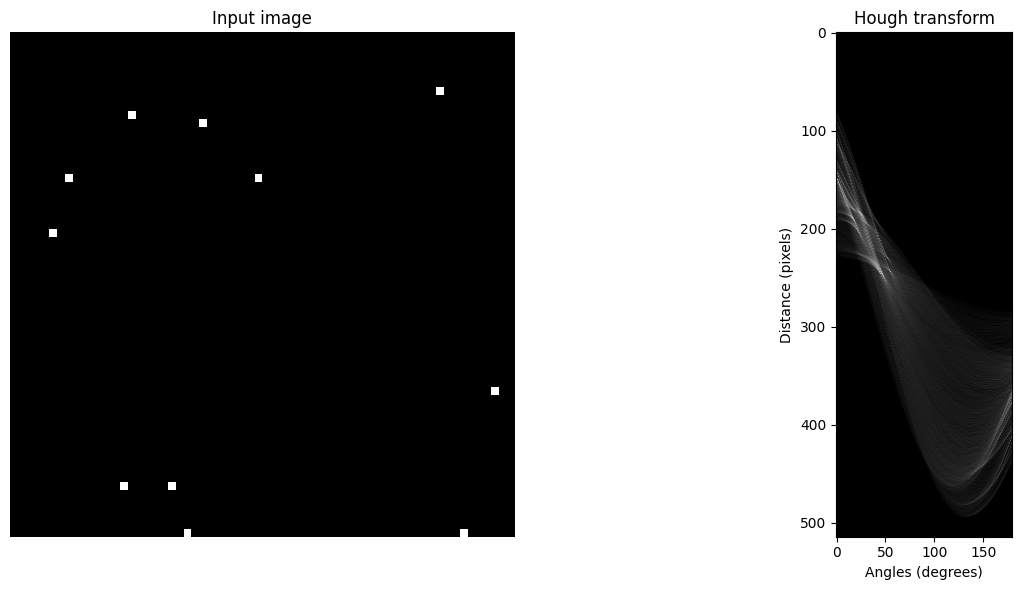

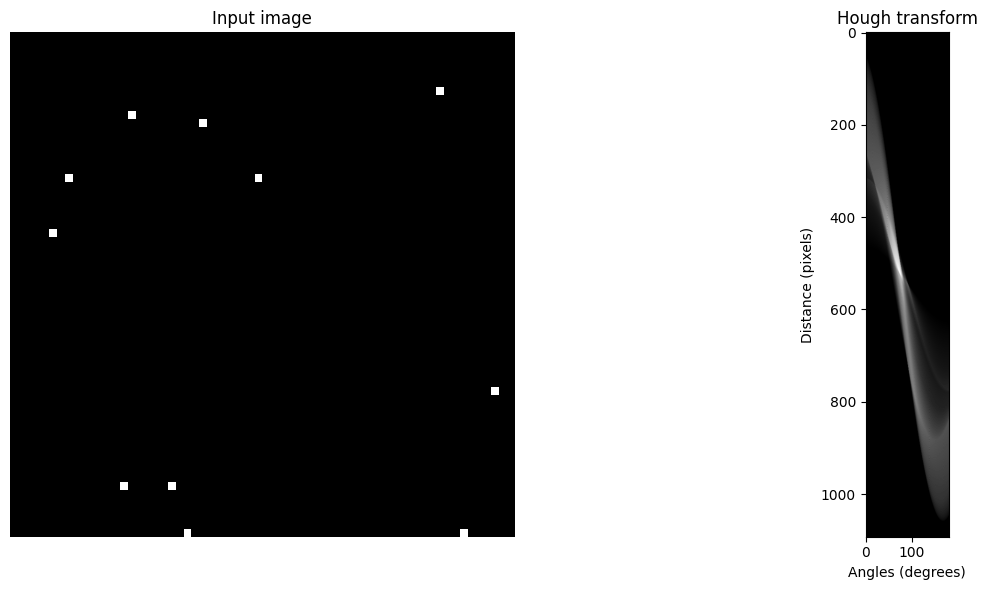

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint64)

In [180]:
import random


im4 = im.copy()
im4_height, im4_width = im4.shape

for _ in range(10):
    im4[random.randint(0, im4_height), random.randint(0, im4_width)] = 1

hough_transform(im4, 3)


### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

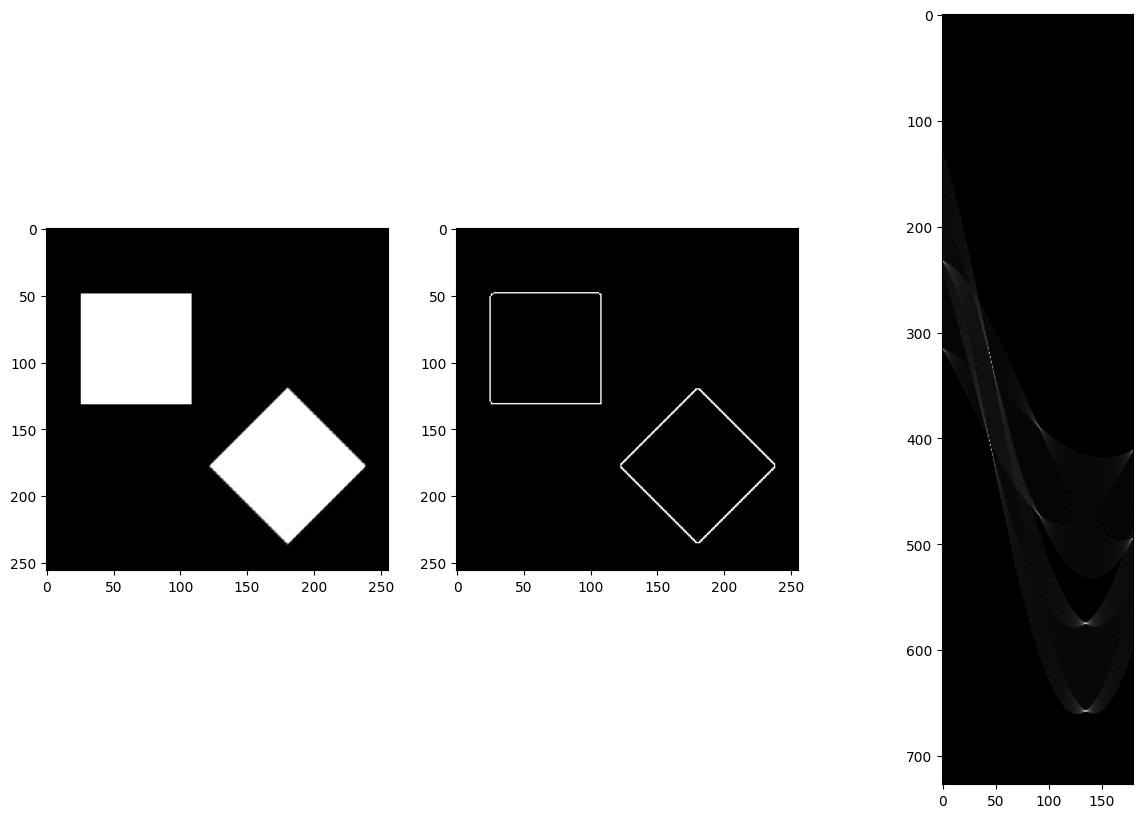

In [181]:
def detect_edges_canny(image, window_size = 3, sigma = 1.7, thr_low = 50, thr_high = 150):
    return cv2.Canny(
        cv2.GaussianBlur(image, (window_size, window_size), sigma),
        thr_low,
        thr_high,
        None,
        3,
        1
    )

image_squares = open_image("kwadraty.png")
image_detected_squares = detect_edges_canny(image_squares)
image_trasnformed_squares = hough_transform(image_detected_squares, 1, False)

show_all([image_squares, image_detected_squares, image_trasnformed_squares])


 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

In [182]:
# fig,ax = plt.subplots(1)
# ax.set_aspect('equal')

hspace, angles, dists = hough_line(image_detected_squares)
best_hspace, best_angles, best_dists = hough_line_peaks(hspace, angles, dists) 

print(best_hspace)
print(best_angles)
print(best_dists)

# ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha

[87 83 79 79 73 71 68 58]
[-1.57079633  0.          0.         -1.57079633 -0.80285146 -0.76794487
  0.76794487  0.80285146]
[-131.  108.   25.  -48.   39.  -35.  212.  294.]


Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

-1.5707963267948966 -131.0
0.0 108.0
0.0 25.0
-1.5707963267948966 -48.0
-0.8028514559173916 39.0
-0.767944870877505 -35.0
0.7679448708775052 212.0
0.8028514559173918 294.0


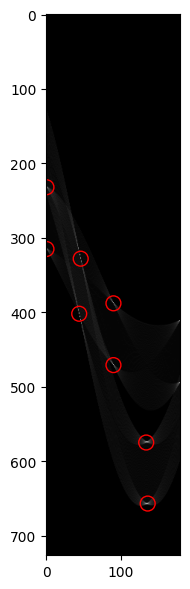

In [183]:
def display_maximums(image):    
    hspace, angles, dists = hough_line(image_detected_squares)
    best_hspace, best_angles, best_dists = hough_line_peaks(hspace, angles, dists) 
    
    fig, ax = plt.subplots(1, figsize=(15, 6))
    ax.set_aspect('equal')

    ax.imshow(hspace, 'gray')

    for angle, distance in zip(best_angles, best_dists):
        x = np.argwhere(angle == angles)
        y = np.argwhere(distance == dists)

        print(angle, distance)
        circle = plt.Circle((x, y), 10, color="r", fill=False)
        ax.add_patch(circle)

    plt.tight_layout()
    plt.show()

display_maximums(image_detected_squares)

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

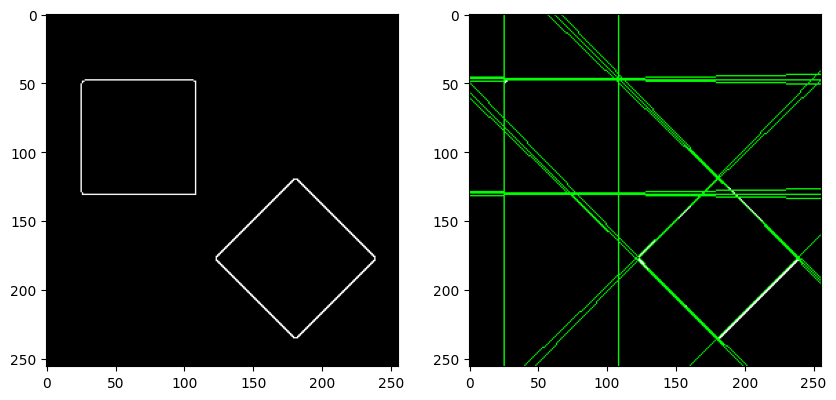

In [184]:

def detect_edges(image, threshold = 50, original_image = None):
    result = cv2.cvtColor(original_image.copy() if original_image is not None else image.copy(), cv2.COLOR_GRAY2RGB)
    lines = cv2.HoughLines(image, 1, np.pi / 180, threshold)
    lines = [line for [line] in lines]

    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))  

        cv2.line(result, (x1,y1), (x2,y2), (0,255,0), 1)

    return result

show_all([image_detected_squares, detect_edges(image_detected_squares)])


9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

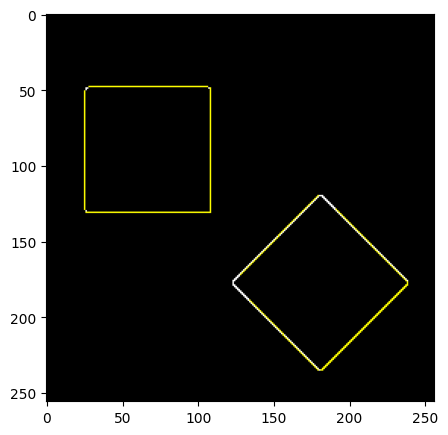

In [185]:
def detect_edges_p(image, min_line_length = 100, max_line_gap = 10, original_image = None):
    result = cv2.cvtColor(
        original_image.copy() if original_image is not None else image.copy(), 
        cv2.COLOR_GRAY2RGB
    )
    lines = cv2.HoughLinesP(image, 1, np.pi / 180, 50, min_line_length, max_line_gap)
    lines = [line for [line] in lines]

    for x1, y1, x2, y2 in lines:
        cv2.line(result, (x1, y1), (x2, y2), (255,255,0), 1)
    
    return result

show_all([
    detect_edges_p(image_detected_squares)
])

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

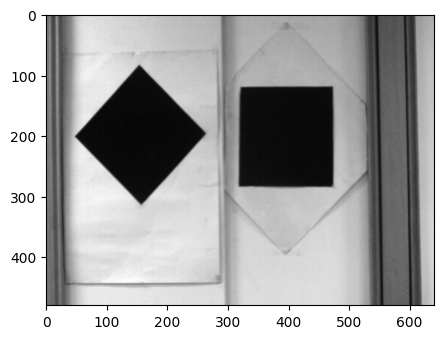

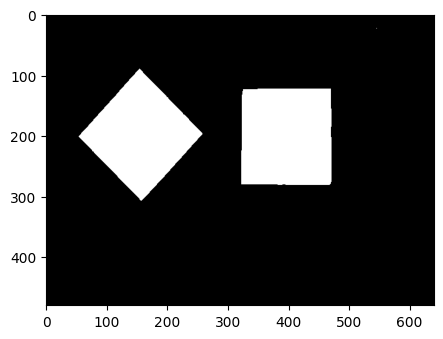

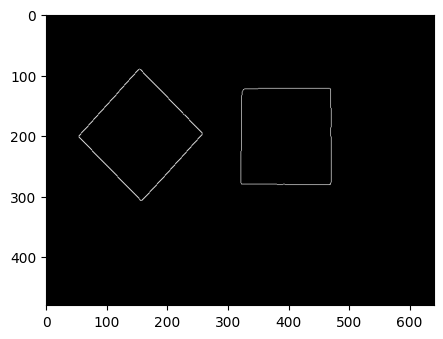

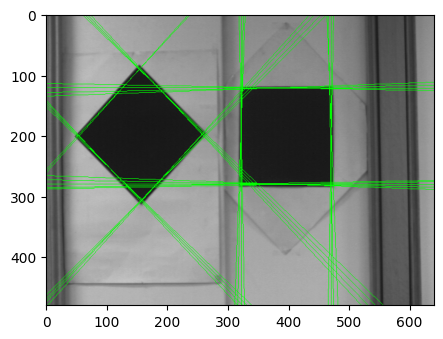

In [186]:
image_lab = open_image('lab112.png')
show_all([image_lab])

kernel_size = 5
kernel = np.ones((kernel_size, kernel_size))

image_lab = (image_lab < 45).astype('uint8')
image_lab = cv2.erode(image_lab, kernel)

show_all([image_lab])

image_detected_lab = detect_edges_canny(image_lab, thr_low = 0, thr_high = 1)
show_all([image_detected_lab])

show_all([detect_edges(image_detected_lab, original_image = open_image('lab112.png'))])

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

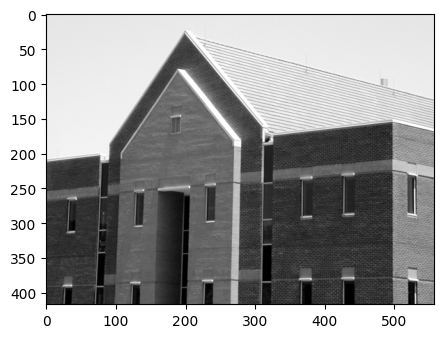

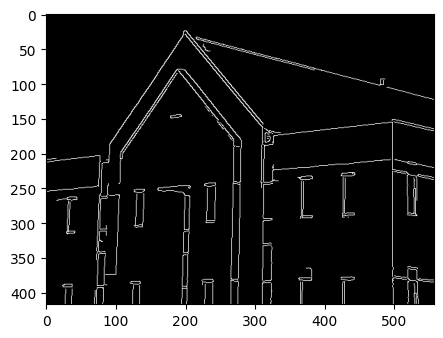

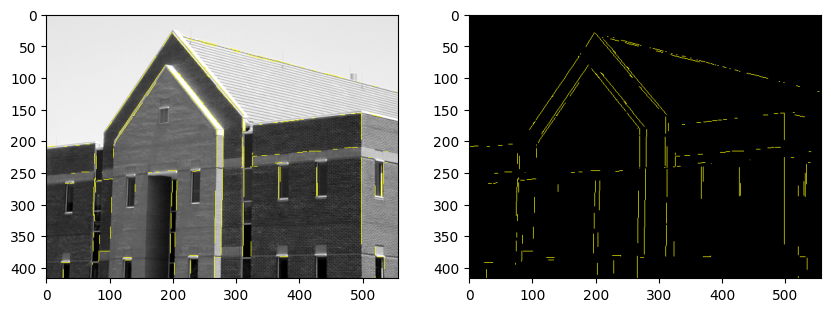

In [187]:
image_home = open_image('dom.png')
show_all([image_home])

thr_low = 75
thr_high = 150
window_size = 5
sigma = 1

image_home_processed = cv2.Canny(
    cv2.GaussianBlur(image_home, (window_size, window_size), sigma),
    thr_low,
    thr_high,
    None,
    3,
    1
)

show_all([image_home_processed])

min_line_length = 200
max_line_gap = 0

show_all([
    detect_edges_p(
        image_home_processed, 
        original_image=image_home, 
        min_line_length=min_line_length, 
        max_line_gap=max_line_gap
    ),
    detect_edges_p(
        image_home_processed, 
        original_image=np.zeros(image_home.shape).astype('uint8'), 
        min_line_length=min_line_length, 
        max_line_gap=max_line_gap
    )
])
